In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-case-study/application_data.csv
/kaggle/input/loan-case-study/previous_application.csv


## Table of contents
## 2.Import Required Libraries
## 3.Reading and understanding the dataset
        3.a. Importing datasets
        3.b. Inspecting Dataframes

## 4.Data Cleaning and Imputation
        4.a. Null value Calculation
        4.b. Analyzing and Dropping Irrelevant Variables in application data
        4.c. Null Value Data Imputation on application data
        4.d. Analyze and Dropping Irrelevant Variables in previous_data
        4.e. Null Value Data Imputation on previous_data
        4.f. Standardize Values
        4.g. Data Type Conversion
        4.h. Outlier Detection
        

## 5.Data Analysis
        5.a. Imbalance Analysis
        5.b. Categorical Variables Analysis
        5.c. Correlation
        5.d. Numerical Variables Analysis

## 6.Merged Dataframes Analysis
## 7.Conclusions

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## 2.Import The Required Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Task-1: Present the overall approach of the analysis**

## 3. Reading and Inspection

-  ### 3.a: Import and read

Import and read the loan application database. Store it in a variable called `loan_app`.
Import and read the previous application database. Store it in a variable called 'pre_app'.

In [5]:
#Loading the application and previous application data set
df_loan_app=pd.read_csv("../input/loan-case-study/application_data.csv")
df_pre_app=pd.read_csv("../input/loan-case-study/previous_application.csv")

  ### 3.b: Inspect the dataframe
Now,first inspect the Loan application dataset and calculate shape, size, describe the data and information of the data set.
Inspect the Loan dataframe's columns, shapes, variable types etc.

In [6]:
# Loading the Loan application data by the df_loan_app variable 
df_loan_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Loading the previous data by the df_pre_app variable 
df_pre_app.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Describe the Loan application
df_loan_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
# Describe the previous data
df_pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [10]:
print("dimension of application_data",df_loan_app.shape)
print("dimension of previous_app_data",df_pre_app.shape)

dimension of application_data (307511, 122)
dimension of previous_app_data (1670214, 37)


In [11]:
print("Size of application_data",df_loan_app.size)
print("Size of previous_app_data",df_pre_app.size)

Size of application_data 37516342
Size of previous_app_data 61797918


In [12]:
#Column name of the loan application data 
print("Column of application_data")
for i in df_loan_app.columns:
    print(i)

Column of application_data
SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_

In [13]:
#Column name of the loan application data
print("Column of previous_application_data")
for i in df_pre_app.columns:
    print(i)

Column of previous_application_data
SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


In [14]:
# Information about the loan application data
df_loan_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [15]:
# Information about the previous data
df_pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## **Task-2:Identify the missing data and use appropriate method to deal with it.**

## 4. Data Cleaning and Imputation




### 4.a.Null value Calculation from Application_data

In [16]:
df_loan_app.isnull().sum() #column-wise null count here

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [17]:
df_loan_app.isnull().sum(axis=1) #row-wise null count here

0          1
1          2
2         48
3         56
4         50
          ..
307506     8
307507    10
307508     4
307509    30
307510    17
Length: 307511, dtype: int64

In [18]:
null_appl = pd.DataFrame(((df_loan_app.isnull().sum()/len(df_loan_app.index))*100)).reset_index() # Create the column-wise null percentages from applicaton_data
null_appl.columns = ['Column Name', 'Null Values Per']

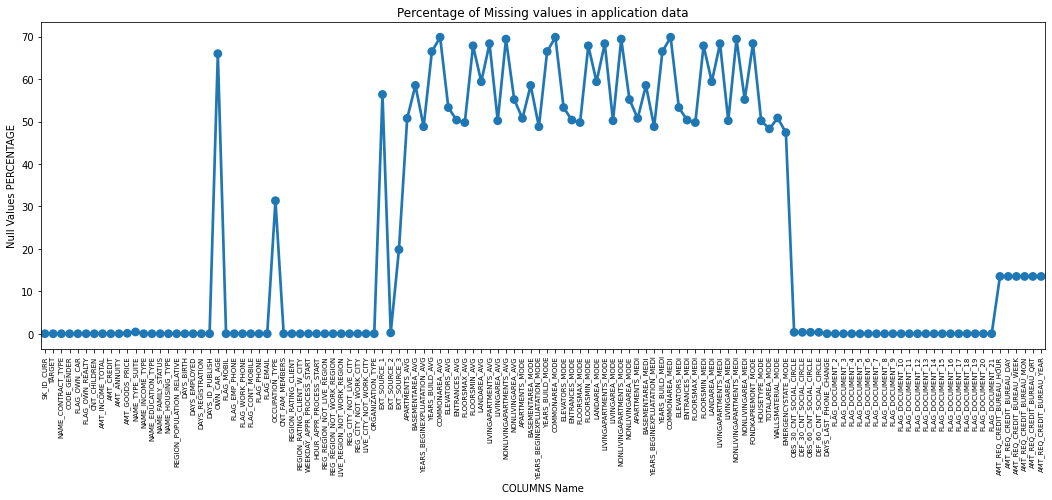

In [19]:
# Plotting the column-wise null percentages 
fig = plt.figure(figsize=(18,6))
sns.pointplot(x='Column Name',y='Null Values Per',data=null_appl)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS Name")
plt.show()

This fig showes that maximun null value is above the 40 percentage, so we remove this column

In [20]:
# more than or equal to 40% empty rows columns in application_data
max_null_app = null_appl[null_appl["Null Values Per"]>=40]
max_null_app
print(len(max_null_app))

49


   ### 4.b Analyze and dropping irrelevent Variables in apllication data


Check the all variable, Is important or not by the correlation mathod

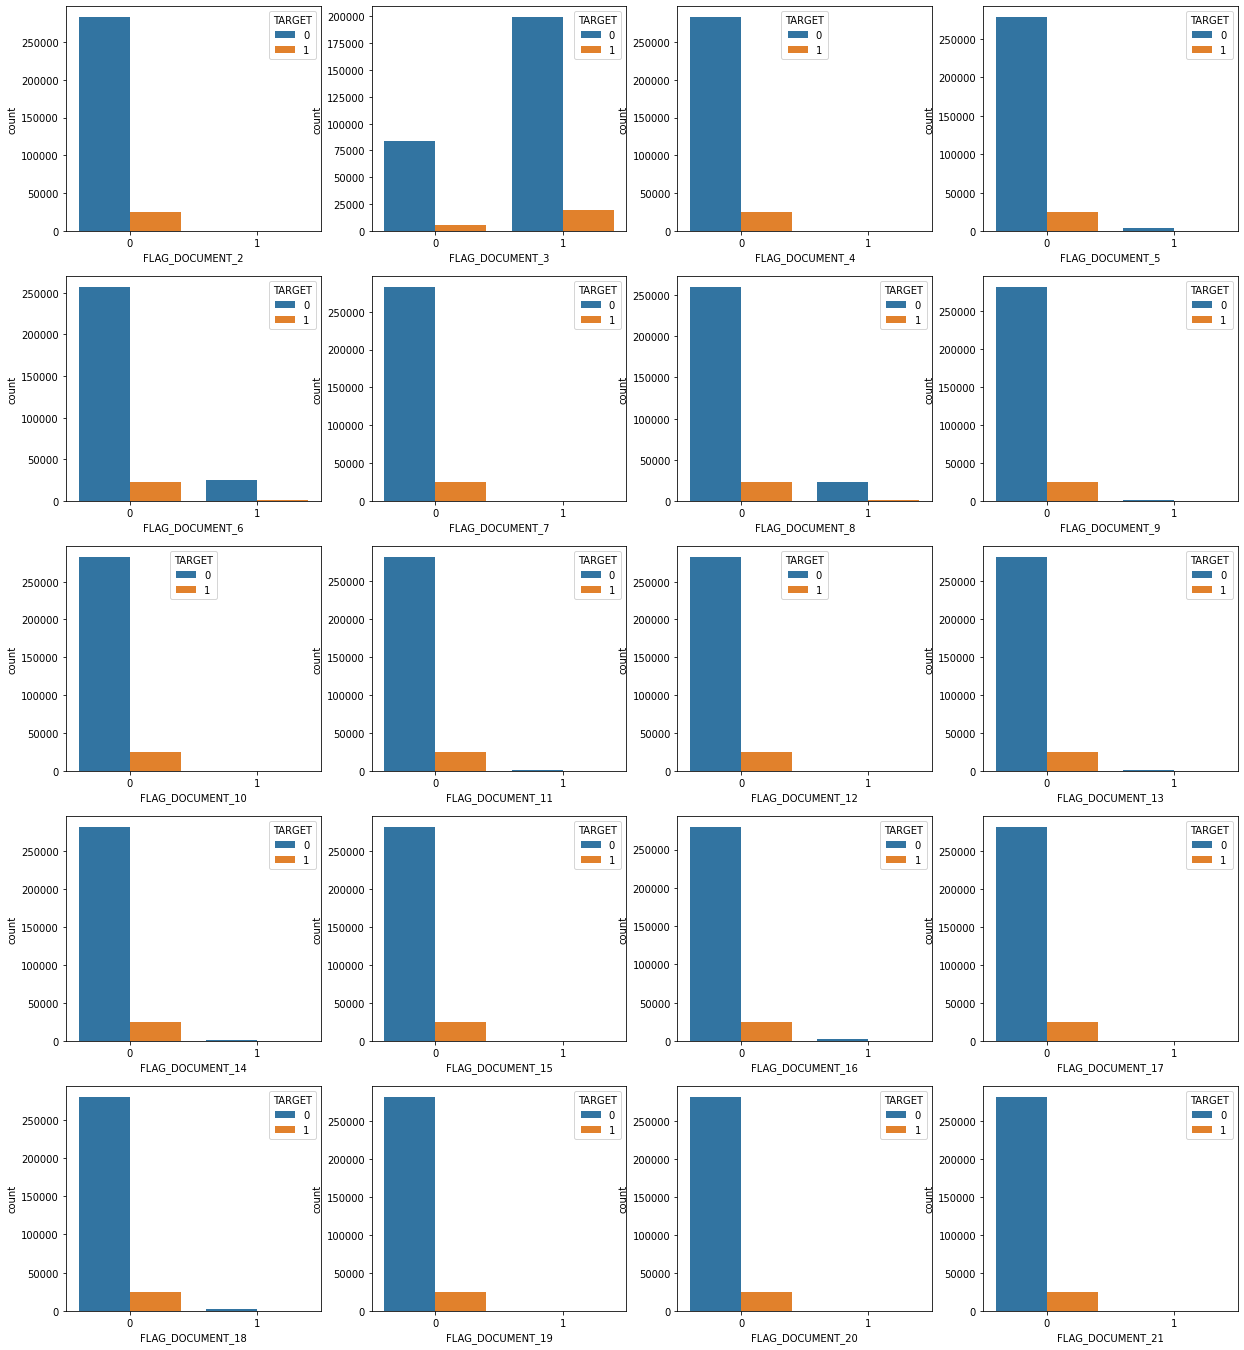

In [21]:
flag_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
plt.figure(figsize=(21,24))
for i in enumerate(flag_Doc):
    plt.subplot(5,4,i[0]+1)
    sns.countplot(i[1],hue='TARGET',data=df_loan_app)


Now, we see Flag documnet columns are those documnt whose ane not submitted by the clint so we make an new column "Total_Flag_Doc". In this columns we add all the flag_documnet because clint are submitted only some document.

In [22]:
df_loan_app['TO_sub_doc']=(df_loan_app['FLAG_DOCUMENT_2']+df_loan_app['FLAG_DOCUMENT_3']+df_loan_app['FLAG_DOCUMENT_4']+df_loan_app['FLAG_DOCUMENT_5']+df_loan_app['FLAG_DOCUMENT_6']+
df_loan_app['FLAG_DOCUMENT_7']+df_loan_app['FLAG_DOCUMENT_8']+df_loan_app['FLAG_DOCUMENT_9']+df_loan_app['FLAG_DOCUMENT_10']+df_loan_app['FLAG_DOCUMENT_11']+df_loan_app['FLAG_DOCUMENT_12']+
df_loan_app['FLAG_DOCUMENT_13']+df_loan_app['FLAG_DOCUMENT_14']+df_loan_app['FLAG_DOCUMENT_15']+df_loan_app['FLAG_DOCUMENT_16']+df_loan_app['FLAG_DOCUMENT_17']+
df_loan_app['FLAG_DOCUMENT_18']+df_loan_app['FLAG_DOCUMENT_19']+df_loan_app['FLAG_DOCUMENT_20']+df_loan_app['FLAG_DOCUMENT_21'])

Drop the all flag_document because noone have submitted any document instead of flag_document_3.

In [23]:
# Create Unused column where all column are not important and lot of nan values
Unused_col=max_null_app["Column Name"].tolist()
Unused_col=Unused_col + flag_Doc
len(Unused_col)

69

<AxesSubplot:>

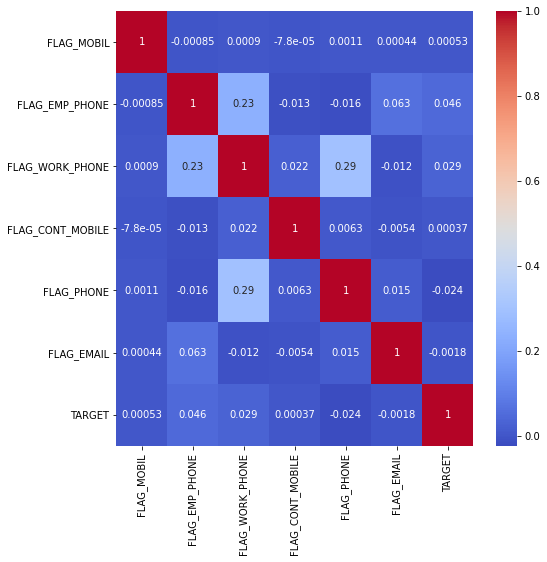

In [24]:
# Now, we check if there is any correlation between mobile phone, work phone, email, and other contacts parameters
flag_con_cols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
                 'FLAG_EMAIL','TARGET']
contact_corr = df_loan_app[flag_con_cols].corr()
fig = plt.figure(figsize=(8,8))
sns.heatmap(contact_corr,xticklabels=contact_corr.columns,yticklabels=contact_corr.columns,
            annot = True, fmt='.2g',cmap= 'coolwarm')

There is no correlation between flags of phone, email etc with target variable(Loan repayment); thus, these columns can be removed.

In [25]:
# Adding flag_contact_column in unused column
flag_con_cols.remove("TARGET")
Unused_col=Unused_col + flag_con_cols
len(Unused_col)

75

<AxesSubplot:>

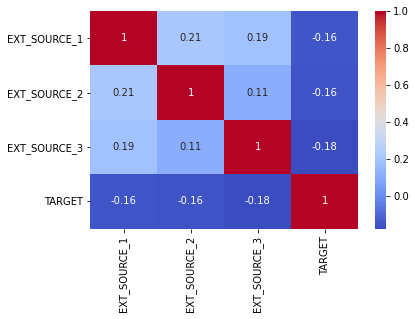

In [26]:
# check correlation between EXT_SOURCE_X columns and TARGET column
ext_source = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]
ext_source_corr = df_loan_app[ext_source].corr()
sns.heatmap(ext_source_corr,xticklabels=ext_source_corr.columns,yticklabels=ext_source_corr.columns,
            annot = True, fmt='.2g',cmap= 'coolwarm')

 
 there is almost no correlation between EXT_SOURCE_X columns and target column, so we will drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [27]:
# Adding ext_source column in Unused column
ext_source.remove("TARGET")
Unused_col=Unused_col + ext_source
len(Unused_col)

78

In [28]:
# First drop this 49 columns whose nullvalues are grater than 40% and some Unused columns related to application _data
df_loan_app.drop(labels=Unused_col,axis=1,inplace=True)

## 4.c. Null Value Data Imputation on application data

**Imputation of null Value on application data **

In [29]:
#Check again the Null Value 
null_appl = pd.DataFrame(((df_loan_app.isnull().sum()/len(df_loan_app.index))*100)).reset_index()
null_appl.columns = ['Column Name', 'Null Values Per']
new_col=null_appl.sort_values(by='Null Values Per',ascending=False)
new_col=new_col.loc[:20,]
new_col

,Column Name,Null Values Per
21,OCCUPATION_TYPE,31.345545
44,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
43,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
42,AMT_REQ_CREDIT_BUREAU_MON,13.501631
41,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
40,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
39,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
11,NAME_TYPE_SUITE,0.420148
37,DEF_60_CNT_SOCIAL_CIRCLE,0.332021
36,OBS_60_CNT_SOCIAL_CIRCLE,0.332021


We still have few null values in the columns:OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.

In [30]:
# Drop the Null value in the relavent column
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_REQ_CREDIT_BUREAU_HOUR'])]
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_REQ_CREDIT_BUREAU_WEEK'])]
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_REQ_CREDIT_BUREAU_DAY'])]
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_REQ_CREDIT_BUREAU_MON'])]
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_REQ_CREDIT_BUREAU_QRT'])]
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_REQ_CREDIT_BUREAU_YEAR'])]
df_loan_app=df_loan_app[~np.isnan(df_loan_app['AMT_GOODS_PRICE'])]

OCCUPATION_TYPE

Impute categorical variable 'OCCUPATION_TYPE', which has high null percentage(31.35%), with a new category as assigning it to any existing category might influence the analysis.

In [31]:
df_loan_app.loc[pd.isnull(df_loan_app['OCCUPATION_TYPE']),['OCCUPATION_TYPE']]='Unknown'

## 4.d. Analyze and Dropping Irrelevant Variables in previous_application_data

In [32]:
# Create the column-wise null percentages from previous_data
null_pre_appl = pd.DataFrame(((df_pre_app.isnull().sum()/len(df_pre_app.index))*100)).reset_index()
null_pre_appl.columns = ['Column Name', 'Null Values Per']
print(null_pre_appl)

                    Column Name  Null Values Per
0                    SK_ID_PREV         0.000000
1                    SK_ID_CURR         0.000000
2            NAME_CONTRACT_TYPE         0.000000
3                   AMT_ANNUITY        22.286665
4               AMT_APPLICATION         0.000000
5                    AMT_CREDIT         0.000060
6              AMT_DOWN_PAYMENT        53.636480
7               AMT_GOODS_PRICE        23.081773
8    WEEKDAY_APPR_PROCESS_START         0.000000
9       HOUR_APPR_PROCESS_START         0.000000
10  FLAG_LAST_APPL_PER_CONTRACT         0.000000
11       NFLAG_LAST_APPL_IN_DAY         0.000000
12            RATE_DOWN_PAYMENT        53.636480
13        RATE_INTEREST_PRIMARY        99.643698
14     RATE_INTEREST_PRIVILEGED        99.643698
15       NAME_CASH_LOAN_PURPOSE         0.000000
16         NAME_CONTRACT_STATUS         0.000000
17                DAYS_DECISION         0.000000
18            NAME_PAYMENT_TYPE         0.000000
19           CODE_RE

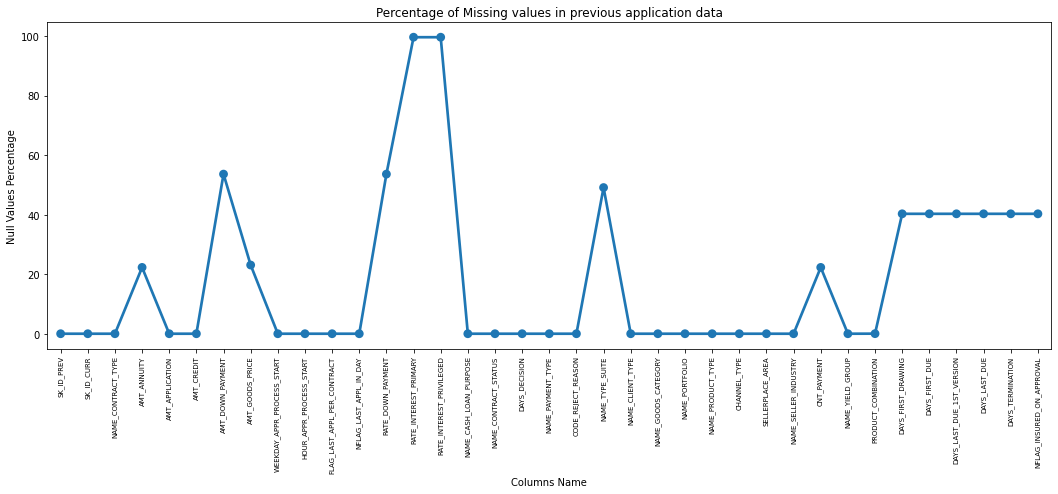

In [33]:
# Plotting column-wise null percentages from previous_data
fig = plt.figure(figsize=(18,6))
sns.pointplot(x='Column Name',y='Null Values Per',data=null_pre_appl)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous application data")
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns Name")
plt.show()

This fig showes that some null value is above the 40 percentage, so we remove this column

In [34]:
# more than or equal to 40% empty rows columns in previous application_data
max_null_pre_app = null_pre_appl[null_pre_appl["Null Values Per"]>=40]
max_null_pre_app
print(len(max_null_pre_app))

11


In [35]:
#Create the removed column where all unused column present
removed_col=max_null_pre_app["Column Name"].tolist()
removed_col=removed_col + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
len(removed_col)

13

In [36]:
# First drop this 49 columns whose nullvalues are grater than 30% and all Unused columns from previous_data
df_pre_app.drop(labels=removed_col,axis=1,inplace=True)

## 4.e. Null Value Data Imputation on previous_data

In [37]:
#Check again the Null Value 
null_value = pd.DataFrame(((df_pre_app.isnull().sum()/len(df_pre_app.index))*100)).reset_index()
null_value.columns = ['Column Name', 'Null Values Per']
new_col2=null_value.sort_values(by='Null Values Per',ascending=False)
new_col2=new_col2.loc[:20,]
new_col2

,Column Name,Null Values Per
6,AMT_GOODS_PRICE,23.081773
3,AMT_ANNUITY,22.286665
21,CNT_PAYMENT,22.286366
23,PRODUCT_COMBINATION,0.020716
5,AMT_CREDIT,0.000060
14,NAME_CLIENT_TYPE,0.000000
22,NAME_YIELD_GROUP,0.000000
20,NAME_SELLER_INDUSTRY,0.000000


**AMT_ANNUITY**

<AxesSubplot:ylabel='Density'>

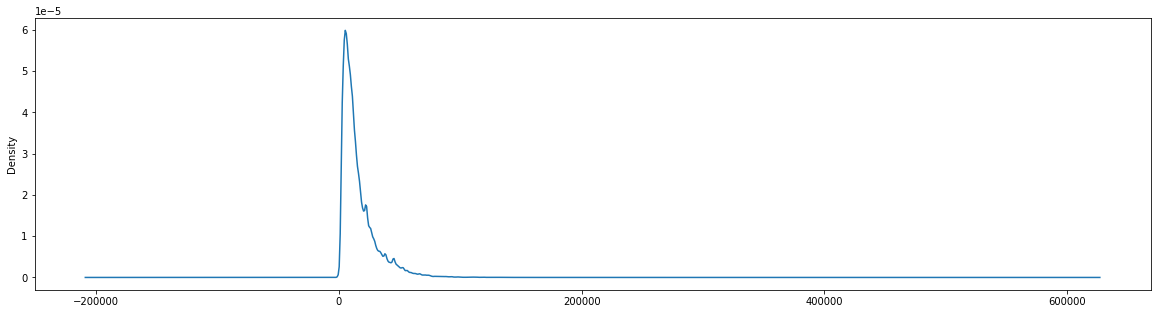

In [38]:
df_pre_app['AMT_ANNUITY'].plot(kind="kde",figsize=(20,5))

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median

In [39]:
df_pre_app['AMT_ANNUITY'].fillna(df_pre_app['AMT_ANNUITY'].median(),inplace = True)

**AMT_GOODS_PRICE**

<AxesSubplot:ylabel='Density'>

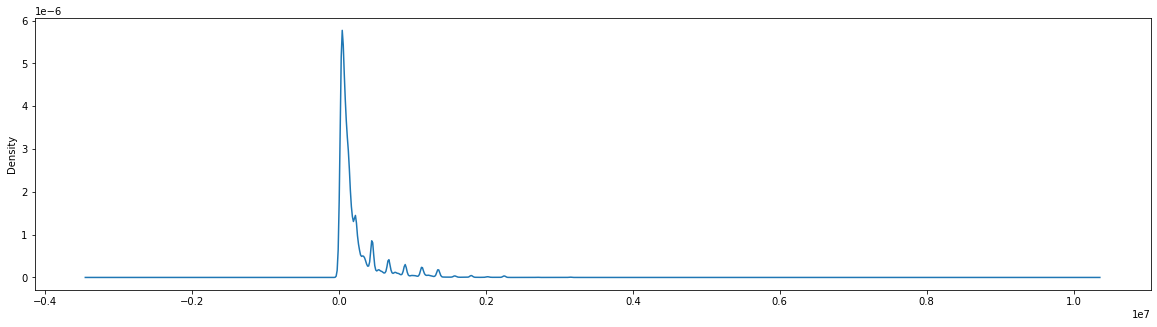

In [40]:
df_pre_app['AMT_GOODS_PRICE'].plot(kind="kde",figsize=(20,5))

There are several peaks along the distribution. Let's impute using the mode because median and mean are not perform well.

In [41]:
df_pre_app['AMT_GOODS_PRICE'].fillna(df_pre_app['AMT_GOODS_PRICE'].mode(),inplace = True)

**CNT_PAYMENT**

In [42]:
df_pre_app['CNT_PAYMENT'].unique()

array([12., 36., 24., 18., nan, 54., 30.,  8.,  3.,  6.,  0., 48., 10.,
       60., 42.,  4.,  5., 16., 20.,  7., 14.,  9., 22., 15., 11., 13.,
       17., 26., 23., 38., 33., 72., 59., 34., 84., 28., 41., 66., 29.,
       32., 44., 39., 40., 46., 35., 19., 47., 45., 21., 53.])

In [43]:
df_pre_app['CNT_PAYMENT'].fillna(0,inplace = True)

## 4.f. Standardize Values

In the application dataset some data are negative value like DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, these are days and we know that days cannot be negative.

In [44]:
# convert negative days to positive days

days_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for cols in days_cols:
    df_loan_app[cols] = abs(df_loan_app[cols])

<AxesSubplot:xlabel='AGE_GROUP', ylabel='count'>

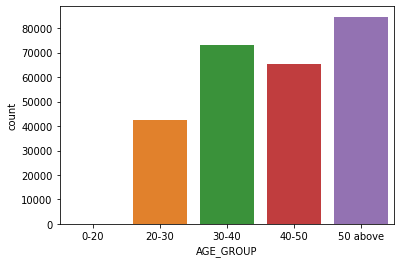

In [45]:
# We creat AGE-Group by the AGE column 

df_loan_app['AGE'] = df_loan_app['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

df_loan_app['AGE_GROUP']=pd.cut(df_loan_app['AGE'],bins=bins,labels=slots)

#checking the percentage which group is taking loan
sns.countplot(x='AGE_GROUP',data=df_loan_app)

Here, we conclude that more than 50% person whose takes the loan is above the 40 age and 32% loan applicant age is 50 above

0-5         54.262404
5-10        25.491303
10-20       15.101852
20-30        3.949920
30-40        1.114988
40-50        0.079532
50-60        0.000000
60 above     0.000000
Name: Emp_Expe, dtype: float64


<AxesSubplot:xlabel='Emp_Expe', ylabel='count'>

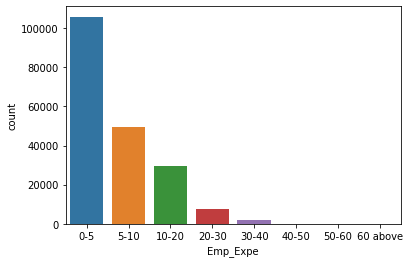

In [46]:
# We creat Employment-Age-Group by the DAYS_EMPLOYED column
df_loan_app['EMPLOYED_AGE'] = df_loan_app['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df_loan_app['Emp_Expe']=pd.cut(df_loan_app['EMPLOYED_AGE'],bins=bins,labels=slots)

#checking the percentage which group is maximum experiance loan
print(df_loan_app['Emp_Expe'].value_counts(normalize=True)*100)
sns.countplot(x='Emp_Expe',data=df_loan_app)

More than 55% of the loan applicants have 0-5 years work experience and almost 80% of them have less than 10 years work experience

100K-200K    50.757818
200k-300k    21.916668
0-100K       19.635118
300k-400k     5.015721
400k-500k     1.835332
500k-600k     0.380698
600k-700k     0.286935
800k-900k     0.096398
700k-800k     0.059119
900k-1M       0.009790
1M Above      0.006401
Name: EMP_INCOME_RANGE, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0-100K'),
  Text(1, 0, '100K-200K'),
  Text(2, 0, '200k-300k'),
  Text(3, 0, '300k-400k'),
  Text(4, 0, '400k-500k'),
  Text(5, 0, '500k-600k'),
  Text(6, 0, '600k-700k'),
  Text(7, 0, '700k-800k'),
  Text(8, 0, '800k-900k'),
  Text(9, 0, '900k-1M'),
  Text(10, 0, '1M Above')])

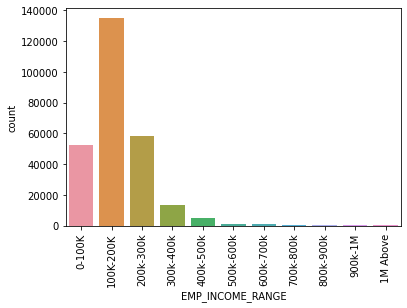

In [47]:
# create Employment Total Income Range column  by Income columns
df_loan_app['AMT_INCOME_TOTAL']=df_loan_app['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df_loan_app['EMP_INCOME_RANGE']=pd.cut(df_loan_app['AMT_INCOME_TOTAL'],bins,labels=slot)

# check the percentage of data in each category
print(df_loan_app['EMP_INCOME_RANGE'].value_counts(normalize=True)*100)
sns.countplot(x='EMP_INCOME_RANGE',data=df_loan_app)
plt.xticks(rotation=90)

More than 50% loan applicants have income 100K-200K. Almost 92% loan applicants have income less than 300K

200k-300k    17.595951
1M Above     16.715081
500k-600k    11.143137
400k-500k    10.398480
100K-200K     9.329846
300k-400k     8.492625
600k-700k     7.940247
800k-900k     7.248645
700k-800k     6.297411
900k-1M       2.935355
0-100K        1.903221
Name: Credit_Amt_Range, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0-100K'),
  Text(1, 0, '100K-200K'),
  Text(2, 0, '200k-300k'),
  Text(3, 0, '300k-400k'),
  Text(4, 0, '400k-500k'),
  Text(5, 0, '500k-600k'),
  Text(6, 0, '600k-700k'),
  Text(7, 0, '700k-800k'),
  Text(8, 0, '800k-900k'),
  Text(9, 0, '900k-1M'),
  Text(10, 0, '1M Above')])

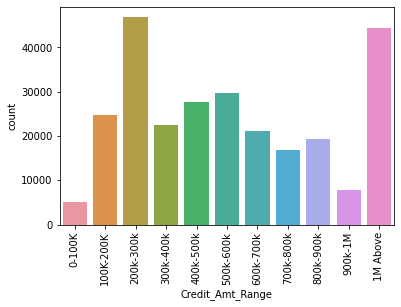

In [48]:
# create Credit Amount Range column  by AMT_CREDIT
df_loan_app['AMT_CREDIT']=df_loan_app['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
        '800k-900k','900k-1M', '1M Above']

df_loan_app['Credit_Amt_Range']=pd.cut(df_loan_app['AMT_CREDIT'],bins,labels=slot)

# check the percentage of data in each category
print(df_loan_app['Credit_Amt_Range'].value_counts(normalize=True)*100)
sns.countplot(x='Credit_Amt_Range',data=df_loan_app)
plt.xticks(rotation=90)

More Than 16% loan applicants have taken loan above 1M.

## 4.g. Data Type Conversion

Convert Object data to Categorical data from Application dataset 

In [49]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                       'LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
                       'WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY']
for col in categorical_columns:
    df_loan_app[col]=df_loan_app[col].astype('category')

In [50]:
df_loan_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265760 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   265760 non-null  int64   
 1   TARGET                       265760 non-null  int64   
 2   NAME_CONTRACT_TYPE           265760 non-null  category
 3   CODE_GENDER                  265760 non-null  category
 4   FLAG_OWN_CAR                 265760 non-null  category
 5   FLAG_OWN_REALTY              265760 non-null  category
 6   CNT_CHILDREN                 265760 non-null  int64   
 7   AMT_INCOME_TOTAL             265760 non-null  float64 
 8   AMT_CREDIT                   265760 non-null  float64 
 9   AMT_ANNUITY                  265749 non-null  float64 
 10  AMT_GOODS_PRICE              265760 non-null  float64 
 11  NAME_TYPE_SUITE              264809 non-null  category
 12  NAME_INCOME_TYPE             265760 non-null

In [51]:
#Converting negative days to positive days 
df_pre_app['DAYS_DECISION'] = abs(df_pre_app['DAYS_DECISION'])

Convert Object data to Categorical data from Previous Application dataset 

In [52]:
Catgorical_col_pre = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']
for col in Catgorical_col_pre:
    df_pre_app[col]=df_pre_app[col].astype('category')

## **Task:3 Identify the outliers in the both dataset**

##  4.h. Outlier Detection

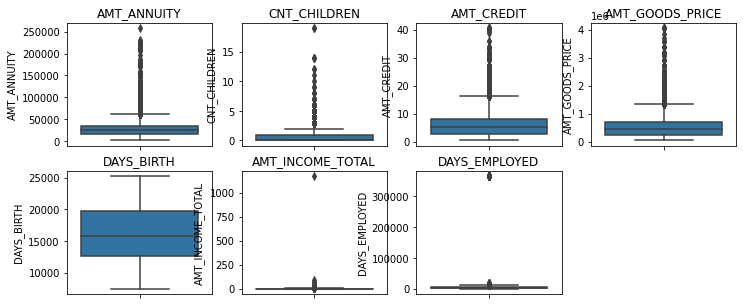

In [53]:
plt.figure(figsize=(12,5))

outlier = ['AMT_ANNUITY', 'CNT_CHILDREN','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','AMT_INCOME_TOTAL','DAYS_EMPLOYED']
for i in enumerate(outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df_loan_app[i[1]])
    plt.title(i[1])


From graph above, we can see that in application_data:

1.AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

2.AMT_INCOME_TOTAL has outlier values that indicate that a few of the loan applicants have high income compared to the others.

3.DAYS_BIRTH has no outlier, which means that the data available is reliable.

4.DAYS_EMPLOYED has outlier values around 350000(days), which translates to ~958 years which is impossible and hence this has to be incorrect entries

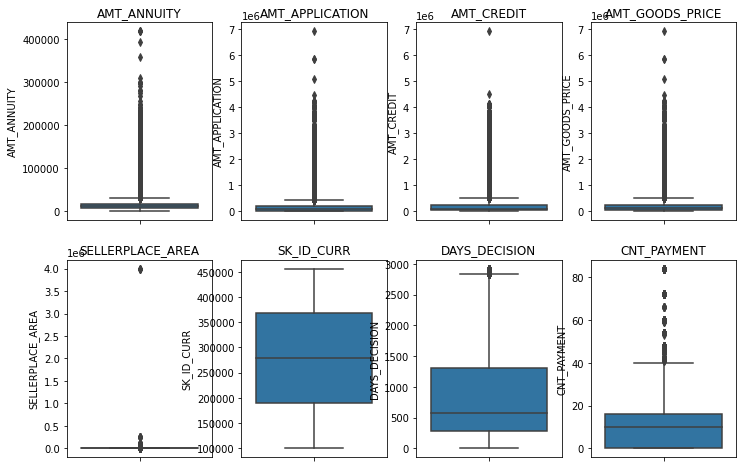

In [54]:
plt.figure(figsize=(12,8))

pre_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','DAYS_DECISION',
               'CNT_PAYMENT']

for i in enumerate(pre_outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df_pre_app[i[1]])
    plt.title(i[1])


From graph above, we can see that in previous_application:

1.AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have a huge number of outliers.

2.CNT_PAYMENT has a few outliers.

3.SK_ID_CURR is an ID column and hence, no outlier.

4.DAYS_DECISION has a very small number of outliers, indicating that these previous applications decisions were taken a long time ago.

## **Task-4: Identify the data are Imbalance in tha dataset**

## 5. Data Analysis

## 5.a. Imbalance Analysis

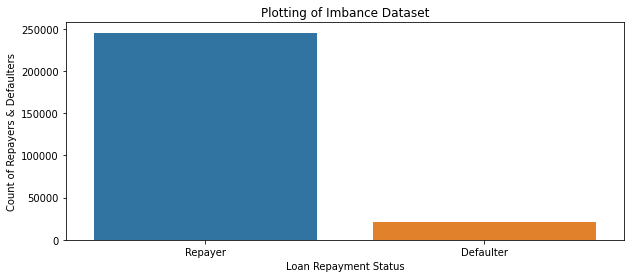

In [55]:
Imbalance=df_loan_app["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance)
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Plotting of Imbance Dataset")
plt.show()

In [56]:
Rep_count = Imbalance.iloc[0]["TARGET"]
Def_count = Imbalance.iloc[1]["TARGET"]
Rep_percent = round(Rep_count/(Rep_count+Def_count)*100,2)
Def_percent = round(Def_count/(Rep_count+Def_count)*100,2)

print('Percent Repayer and Defaulter are: %.2f and %.2f'%(Rep_percent,Def_percent))
print('Ratio of Repayer and Defaulter are: %.2f'%(Rep_count/Def_count))

Percent Repayer and Defaulter are: 92.28 and 7.72
Ratio of Repayer and Defaulter are: 11.95


## **Task-5:Explain the results of univariate, segmented univariate, bivariate analysis, etc**

## Univariate Analysis

([<matplotlib.patches.Wedge at 0x7f893e65fc50>,
 [Text(-0.5868405378070695, 1.0467178144974458, 'Male'),
  Text(0.586791046749891, -1.0467455600355644, 'Female'),
  Text(1.1999999986588537, -5.673403975142417e-05, 'XNA')],
 [Text(-0.3423236470541239, 0.6105853917901767, '66.3%'),
  Text(0.34229477727076973, -0.6106015766874124, '33.7%'),
  Text(0.6999999992176646, -3.309485652166409e-05, '0.0%')])

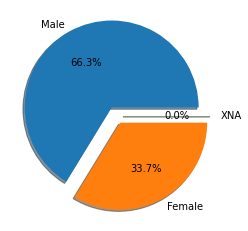

In [57]:
r=pd.get_dummies(df_loan_app['CODE_GENDER'])
r1=(sum(r["F"]),sum(r["M"]),sum(r["XNA"]))
plt.pie(r1,labels=["Male","Female","XNA"],shadow=True,explode=(.1,.1,.1),autopct='%1.1f%%')

66.3% Male and  33.7 Female are loan applicant

([<matplotlib.patches.Wedge at 0x7f893e652b90>,
 [Text(-1.1489360721652069, 0.34633206908628417, 'Cash loans'),
  Text(1.1489360640587196, -0.34633209597907355, 'Revolving loans')],
 [Text(-0.6702127087630374, 0.20202704030033242, '90.7%'),
  Text(0.6702127040342529, -0.2020270559877929, '9.3%')])

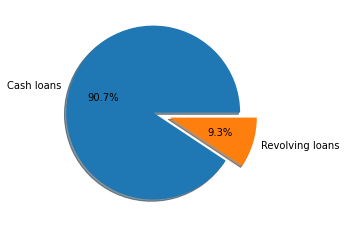

In [58]:
r=pd.get_dummies(df_loan_app['NAME_CONTRACT_TYPE'])
r1=(sum(r["Cash loans"]),sum(r["Revolving loans"]))
plt.pie(r1,labels=["Cash loans","Revolving loans"],shadow=True,explode=(.1,.1),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f893e5b2d10>,
 [Text(-0.6749411836523925, 0.9921967539807353, 'Y'),
  Text(0.6749412765485534, -0.992196690788177, 'N')],
 [Text(-0.39371569046389565, 0.5787814398220954, '69.0%'),
  Text(0.3937157446533228, -0.5787814029597699, '31.0%')])

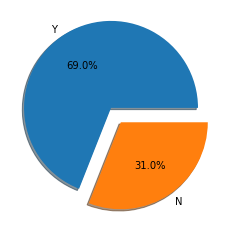

In [59]:
r=pd.get_dummies(df_loan_app['FLAG_OWN_REALTY'])
r1=(sum(r["Y"]),sum(r["N"]))
plt.pie(r1,labels=["Y","N"],shadow=True,explode=(.1,.1),autopct='%1.1f%%')

NAME_CONTRACT_TYPE             Cash loans  Revolving loans     All
NAME_EDUCATION_TYPE                                               
Academic degree                       128               16     144
Higher education                    58282             8147   66429
Incomplete higher                    7607              983    8590
Lower secondary                      2977              168    3145
Secondary / secondary special      171999            15453  187452
All                                240993            24767  265760


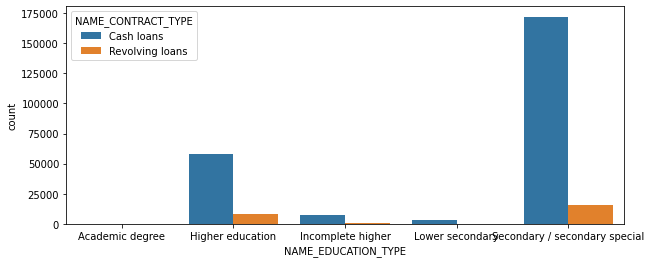

In [60]:
plt.figure(figsize=(10,4))
sns.countplot(x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_TYPE',data=df_loan_app);

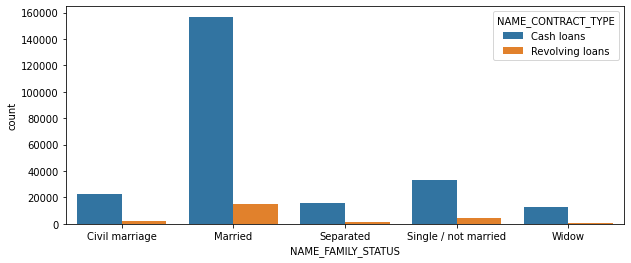

In [61]:
plt.figure(figsize=(10,4))
sns.countplot(x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_TYPE',data=df_loan_app);

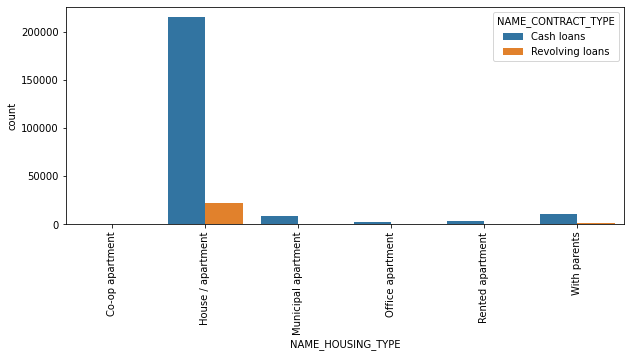

In [62]:
plt.figure(figsize=(10,4))
sns.countplot(x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

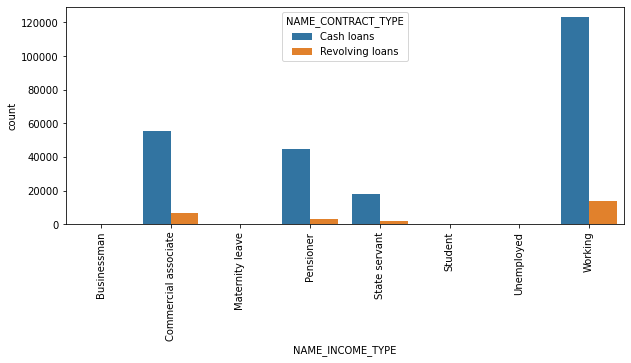

In [63]:
plt.figure(figsize=(10,4))
sns.countplot(x='NAME_INCOME_TYPE',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

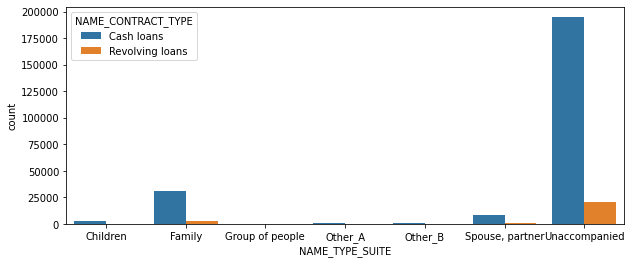

In [64]:
plt.figure(figsize=(10,4))
sns.countplot(x='NAME_TYPE_SUITE',hue='NAME_CONTRACT_TYPE',data=df_loan_app);

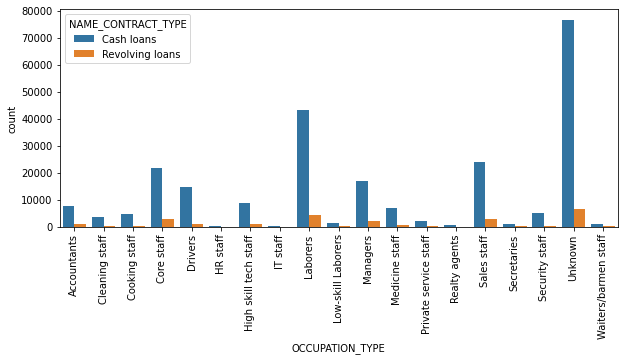

In [65]:
plt.figure(figsize=(10,4))
sns.countplot(x='OCCUPATION_TYPE',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

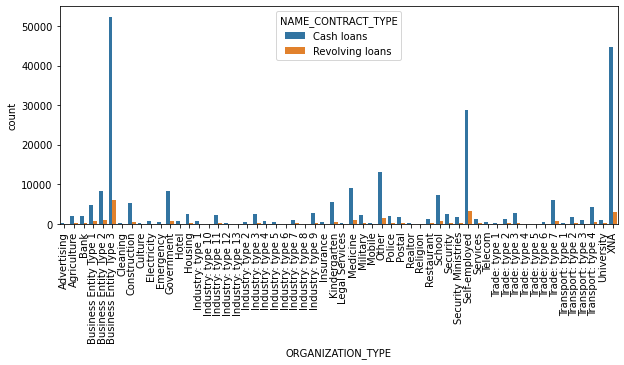

In [66]:
plt.figure(figsize=(10,4))
sns.countplot(x='ORGANIZATION_TYPE',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

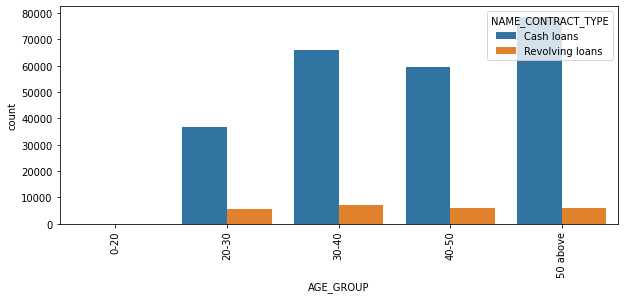

In [67]:
plt.figure(figsize=(10,4))
sns.countplot(x='AGE_GROUP',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

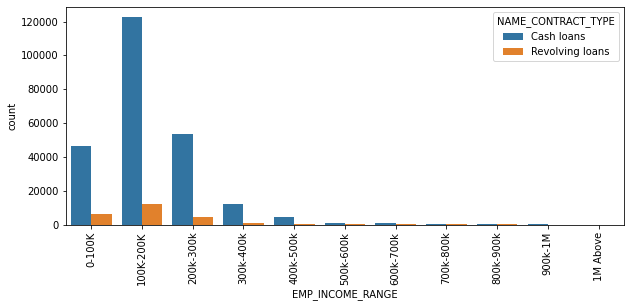

In [68]:
plt.figure(figsize=(10,4))
sns.countplot(x='EMP_INCOME_RANGE',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

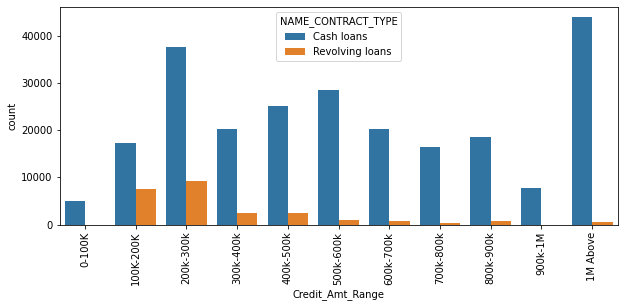

In [69]:
plt.figure(figsize=(10,4))
sns.countplot(x='Credit_Amt_Range',hue='NAME_CONTRACT_TYPE',data=df_loan_app)
plt.xticks(rotation=90);

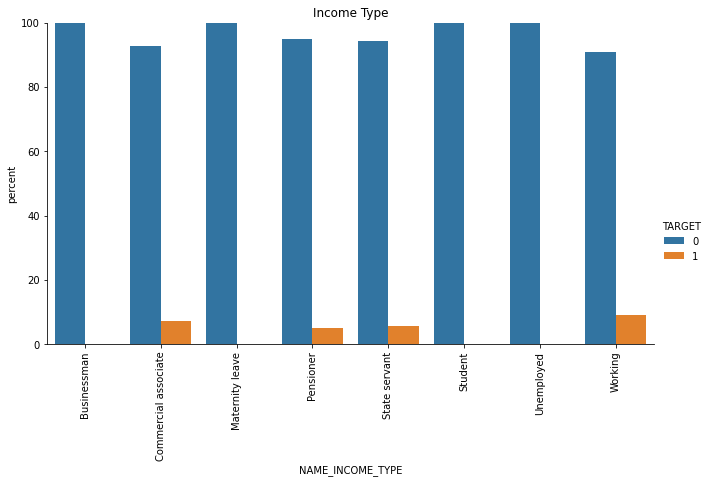

,NAME_INCOME_TYPE,TARGET,percent
0,Businessman,0,100.000000
1,Commercial associate,0,92.789263
2,Commercial associate,1,7.210737
3,Maternity leave,0,100.000000
4,Pensioner,0,94.848949
5,Pensioner,1,5.151051
6,State servant,0,94.444730
7,State servant,1,5.555270
8,Student,0,100.000000
9,Unemployed,0,100.000000


In [70]:
## Income sources of Applicant's in terms of loan is repayed or not in %
x,y = 'NAME_INCOME_TYPE', 'TARGET'

df1 = df_loan_app.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100);df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.title('Income Type')
plt.show()

df1

Observation:
1) 100% Businessmen and students are paying loan amount on time or we can say do not have any payment difficulties

2) 40% of Maternity Leave and 36.36% of Unemployed are Defaulters or have payment difficulties

3) Most of the people who are working as Commercial associate or pensioner or state servant or belong to working class are paying their installment on time

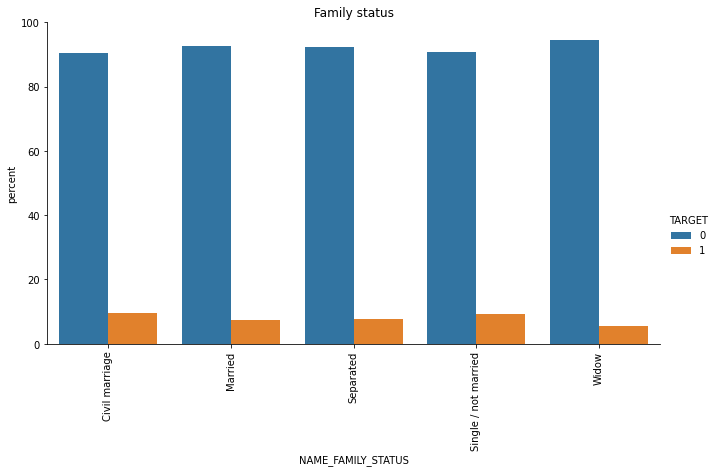

,NAME_FAMILY_STATUS,TARGET,percent
0,Civil marriage,0,90.551370
1,Civil marriage,1,9.448630
2,Married,0,92.679722
3,Married,1,7.320278
4,Separated,0,92.184346
5,Separated,1,7.815654
6,Single / not married,0,90.827324
7,Single / not married,1,9.172676
8,Widow,0,94.474820
9,Widow,1,5.525180


In [71]:
## Family Status of Applicant's in terms of loan is repayed or not in %
x,y = 'NAME_FAMILY_STATUS', 'TARGET'

df1 = df_loan_app.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100);df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.title('Family status')
plt.show()
df1

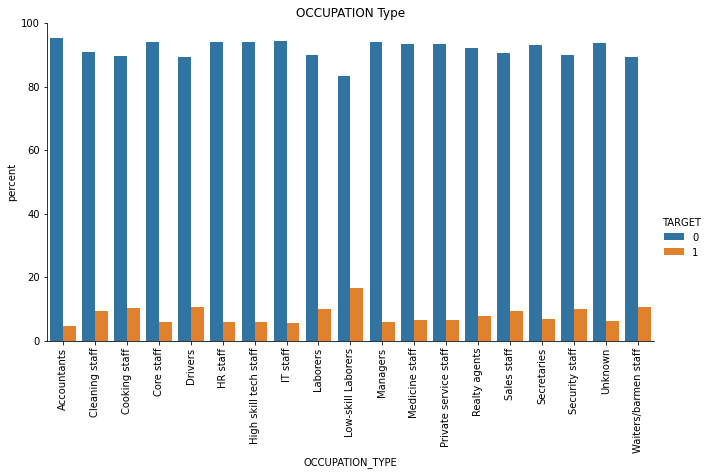

,OCCUPATION_TYPE,TARGET,percent
0,Accountants,0,95.295192
1,Accountants,1,4.704808
2,Cleaning staff,0,90.778171
3,Cleaning staff,1,9.221829
4,Cooking staff,0,89.789908
5,Cooking staff,1,10.210092
6,Core staff,0,94.059690
7,Core staff,1,5.940310
8,Drivers,0,89.232022
9,Drivers,1,10.767978


In [72]:
## Occupation type of Applicant's in terms of loan is repayed or not in %
x,y = 'OCCUPATION_TYPE', 'TARGET'

df1 = df_loan_app.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100);df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.title('OCCUPATION Type')
plt.show()
df1

Observation:
##### let us take 10% as the threshold limit below which bank is allowed to take risk and more than that its an risk to give loan
##### Considering people in occupataion where they are facing issues in payment are Coocking staff, Drivers, Laborers, Low-skill Laboures, Security staff, waiters/barmen staff
##### All other occupation type is able to pay on time
##### People working as Accountant are repaying their loan amount on time

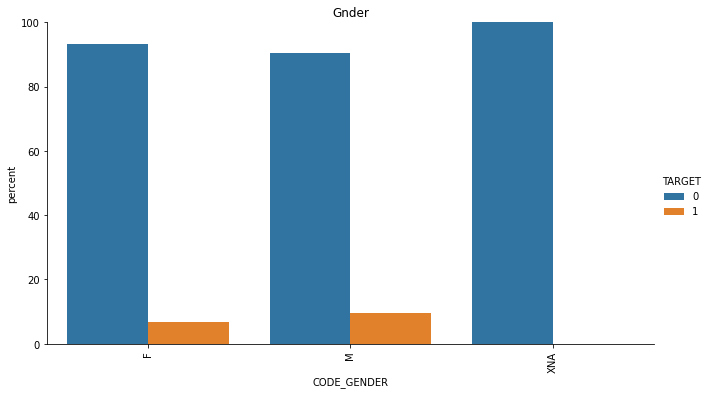

,CODE_GENDER,TARGET,percent
0,F,0,93.260877
1,F,1,6.739123
2,M,0,90.351366
3,M,1,9.648634
4,XNA,0,100.000000


In [73]:
## Gender of Applicant's in terms of loan is repayed or not in %
x,y = 'CODE_GENDER', 'TARGET'

df1 = df_loan_app.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100);df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.title('Gnder')
plt.show()
df1

Observation:
##### 100% of XNA are paying loan
##### 93% of Male applier are not having issue in paying loan
##### Hence Mail and XNA are able to pay the loan amount.

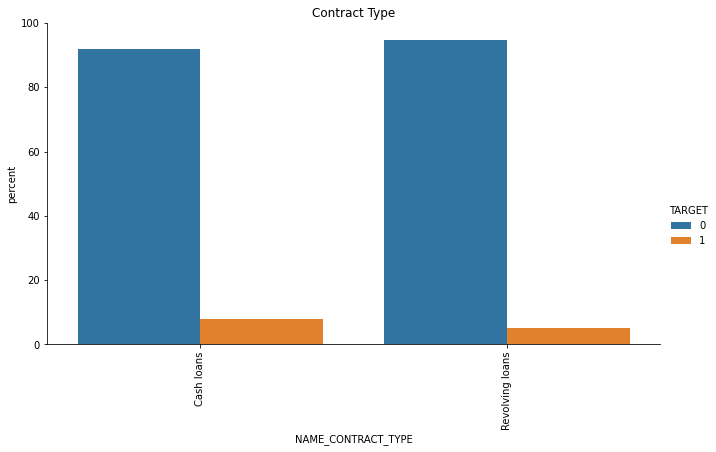

,NAME_CONTRACT_TYPE,TARGET,percent
0,Cash loans,0,92.018025
1,Cash loans,1,7.981975
2,Revolving loans,0,94.823757
3,Revolving loans,1,5.176243


In [74]:
## CONTRACT TYPE of Applicant's in terms of loan is repayed or not in %
x,y = 'NAME_CONTRACT_TYPE', 'TARGET'

df1 = df_loan_app.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100);df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
g.ax.set_ylim(0,100)

plt.xticks(rotation=90)
plt.title('Contract Type')
plt.show()
df1

Observation:
##### 94.52 % of Revolving loans and 91.65% of Cash loan is getting paid without any difficulties.
##### Revolving Loan are getting paid more than cash loans

## **Task-6:Find the top 10 correlation for the client with payments**

In [75]:
df_0= df_loan_app[df_loan_app['TARGET']==0]
df_1 = df_loan_app[df_loan_app['TARGET']==1]

In [76]:
# For Defalder
var_numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_1 = (df_1.select_dtypes(include=var_numerics)).corr().abs()
corr_1 = pd.DataFrame(corr_1.unstack()).reset_index()
corr_1.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
dup = (corr_1[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (corr_1['FEATURE_1']==corr_1['FEATURE_2']) 
corr_1 = corr_1[~dup]
corr_10=pd.DataFrame(corr_1)
corr_10=corr_10.sort_values(by='CORRELATION',ascending=False)
corr_10=corr_10.iloc[:10,]
corr_10

,FEATURE_1,FEATURE_2,CORRELATION
135,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998321
21,AMT_CREDIT,AMT_GOODS_PRICE,0.982888
154,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.866161
39,AMT_ANNUITY,AMT_GOODS_PRICE,0.752299
20,AMT_CREDIT,AMT_ANNUITY,0.751130
153,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.326264
134,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.322835
172,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.250485
136,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.247304
229,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,0.246738


In [77]:
#For Non-Defalder
var_numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_2 = (df_0.select_dtypes(include=var_numerics)).corr().abs()
corr_2 = pd.DataFrame(corr_2.unstack()).reset_index()
corr_2.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
dup = (corr_2[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (corr_2['FEATURE_1']==corr_2['FEATURE_2']) 
corr_2 = corr_2[~dup]
corr_10=pd.DataFrame(corr_2)
corr_10=corr_10.sort_values(by='CORRELATION',ascending=False)
corr_10=corr_10.iloc[:10,]
corr_10

,FEATURE_1,FEATURE_2,CORRELATION
135,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998529
21,AMT_CREDIT,AMT_GOODS_PRICE,0.987150
154,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.858450
39,AMT_ANNUITY,AMT_GOODS_PRICE,0.777947
20,AMT_CREDIT,AMT_ANNUITY,0.772985
2,AMT_INCOME_TOTAL,AMT_ANNUITY,0.445973
3,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.371694
1,AMT_INCOME_TOTAL,AMT_CREDIT,0.365020
153,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.333553
134,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.331476


In [78]:
df_loan_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT           category
REGION_RATING_CLIENT_W_CITY    category


<Figure size 1440x1080 with 0 Axes>

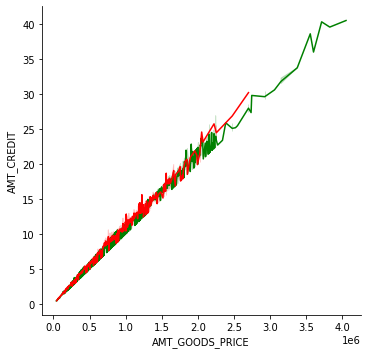

In [79]:
# check the relationship between Goods price and Credit against Loan repayment staus
plt.figure(figsize=(20,15))
sns.relplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=df_loan_app,hue="TARGET", kind="line",palette=['g','r'],legend=False)

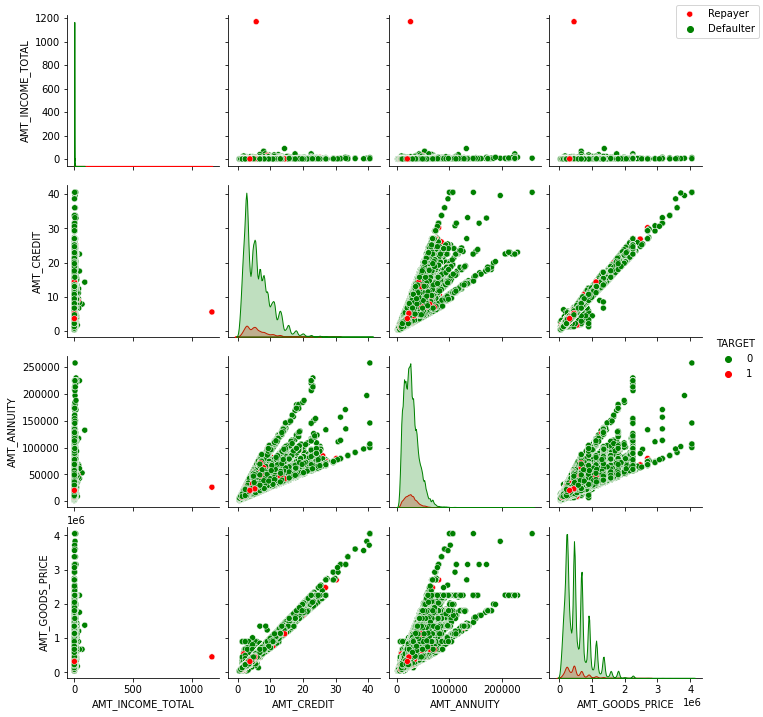

In [80]:
# pairplot between AMT_X against Loan repayment status
amount = df_loan_app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

Comments:
1.When AMT_ANNUITY >150k and AMT_GOODS_PRICE > 3M, there is a very small chance of defaulting

2.AMT_CREDIT and AMT_GOODS_PRICE are highly correlated - most of the data are consolidated in the form of a line in the scatterplot

3.There are very small defaulters for AMT_CREDIT >2.5M

## 5.Merge the application data and previous data

In [81]:
loan_process_df = pd.merge(df_loan_app,df_pre_app, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [86]:
loan_process_df['NAME_CONTRACT_STATUS'].value_counts()

Approved        779288
Canceled        229262
Refused         219221
Unused offer     21285
Name: NAME_CONTRACT_STATUS, dtype: int64

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       722242     92.68%
                     1        57046      7.32%
Canceled             0       208815     91.08%
                     1        20447      8.92%
Refused              0       193976     88.48%
                     1        25245     11.52%
Unused offer         0        19570     91.94%
                     1         1715      8.06%


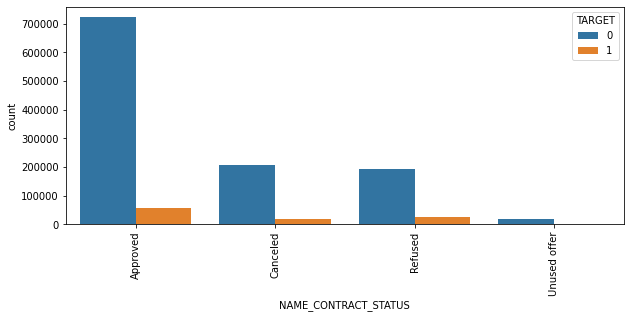

In [88]:
# check the Contract Status vs. Loan repayment status
plt.figure(figsize=(10,4))
sns.countplot(x='NAME_CONTRACT_STATUS',hue='TARGET',data=loan_process_df)
plt.xticks(rotation=90)
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" 
print (df1)


~90% of the clients who previously cancelled have actually been repaying the current loans.

88% of the clients who were previously refused a loan have been repaying the current loans. The bank should further analyze Refused applications as these category seem to have high probability of repaying the loans.

## **Task-6: CONCLUSION**

After analysing the given datasets, there are few variable(attribute) of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consiseder as below with the contributing factors and categorization are safest and danger:

The safest categories to offer loans:

**NAME_EDUCATION_TYPE:** People with academic degree.

**NAME_INCOME_TYPE:** Students and Businessmen..

**ORGANIZATION_TYPE:** People with Trade Type 4 and Industry type 12

**DAYS_BIRTH:** People above age of 50.

**DAYS_EMPLOYED:** People with 40+ year employment.

**AMT_INCOME_TOTAL:** People with Income 700k-800k

**NAME_CASH_LOAN_PURPOSE:** Loans purpose for Hobby, Buying a garage.


The riskier categories to offer loans:

**CODE_GENDER:** Men

**NAME_FAMILY_STATUS:** Civil marriage or Single

**NAME_EDUCATION_TYPE:** Lower Secondary or Secondary

**NAME_INCOME_TYPE:** Maternity leave or Unemployed

**OCCUPATION_TYPE:** Low-skill Laborers (riskiest), Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff

**ORGANIZATION_TYPE:** Transport: type 3 (riskiest), Industry: type 13, Industry: type 8

**DAYS_BIRTH:** age group of 20-40

**DAYS_EMPLOYED:** less than 5 years

**AMT_GOODS_PRICE:** above 3M